<a href="https://colab.research.google.com/github/Omotoso526/Rainfall-Prediction-With-Logistics-Regression/blob/braanch/Untitled12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Rainfall Prediction Project**

This project aims to extensively explore the weather conditions or characteristics associated with rainfall and also predicts whether it will rain or not tomorrow. In this project, we will be utilizing a logistic regression model for our predictions as it has been described as one of the perfect models for classification problems( i.e wether it will rain or not)

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
raw_data = pd.read_csv("/content/weatherAUS.csv")

In [3]:
raw_data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [4]:
raw_data.shape

(145460, 23)

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Since we are predicting either of the rain today or rain column, it is of the best idea to discard the rows where the value of "RainTomorrow" or "RainToday" is missing to make our analysis and modeling simpler.

In [6]:
raw_data.dropna(subset = [ "RainToday", "RainTomorrow"], inplace=True)

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null

In [8]:
#specifying the numeric columns and checkingg for null values in numeric columns
numeric_cols = raw_data.select_dtypes(include='number').columns.tolist()
raw_data[numeric_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

In [9]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


**Exploratory Data Analysis and Visualization**

Before training a model, it is always good to find explore and find relationship betweeen features for better understanding of the dataset, as well as their relationship with the prediction target.

In [10]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
sns.set_style('darkgrid')
matplotlib.rcParams["font.size"] = 5
matplotlib.rcParams["figure.figsize"] = (10,6)
matplotlib.rcParams["figure.facecolor"] = "#00000000"

In [12]:
px.histogram(raw_data, x= "Location", title = "Location vs Rainy days", color ="RainToday")

In [13]:
px.histogram(raw_data,
             x = "Temp3pm",
             title = "Temperature at 3 pm vs Rain Tomorrow",
             color = "RainTomorrow")


In [14]:
px.histogram(raw_data,
             x = "RainToday",
             title = "RainToday vs RainTomorrow",
             color = "RainTomorrow")

In [15]:
px.scatter(raw_data.sample(3000),
           title = "Min Temp vs Max Temp",
           x = "MinTemp",
           y = "MaxTemp",
           color = "RainToday")

In [16]:
px.strip(raw_data.sample(2000),
           title = "Temp3pm vs Humidity3pm",
           x = "Temp3pm",
           y = "Humidity3pm",
           color = "RainTomorrow")

**Modeling**

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train_val_df, test_df = train_test_split(raw_data, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state = 42)

In [19]:
print("train_df_shape :", train_df.shape)
print("val_df_shape :", val_df.shape)
print("test_df.shape :", test_df.shape)

train_df_shape : (84471, 23)
val_df_shape : (28158, 23)
test_df.shape : (28158, 23)


When working with dataset with date column, it is often preferable to separate the train, test and validation data based on dates, so as to to train the model on data from the past and evaluate on data from the future.

<Axes: title={'center': 'No of rows per year'}, xlabel='Date', ylabel='count'>

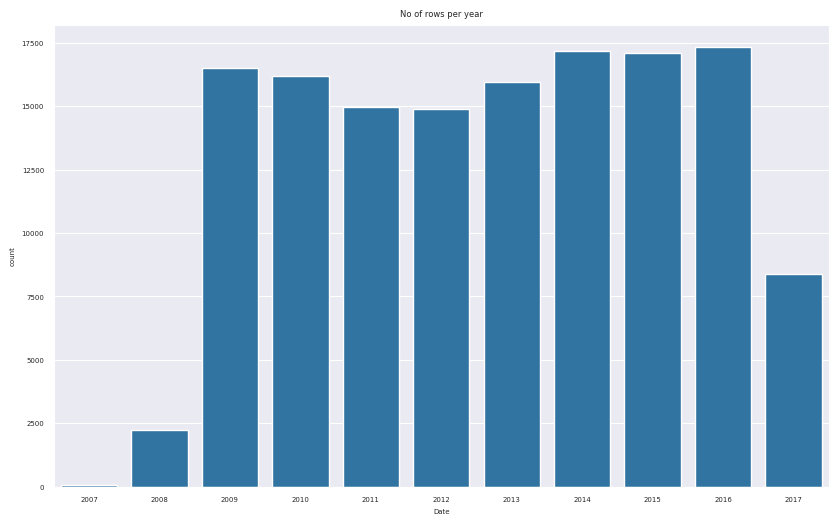

In [20]:
plt.title("No of rows per year")
sns.countplot(x = pd.to_datetime(raw_data.Date).dt.year)

In [21]:
year = pd.to_datetime(raw_data.Date).dt.year

train_df = raw_data[year < 2015]
val_df = raw_data[year == 2015]
test_df = raw_data[year > 2015]

In [22]:
print("train_df_shape :", train_df.shape)
print("val_df_shape :", val_df.shape)
print("test_df.shape :", test_df.shape)

train_df_shape : (97988, 23)
val_df_shape : (17089, 23)
test_df.shape : (25710, 23)


While this may not contain a perfect 60-20-20 split, this split encapsulates all 12 months of the year, making it a very realistic split

**Identifying input and target columns**

Building an efficient ML model requires that only necessary or important columns are used as features, therefore we can ignore column like date. Let us create a list of features and identify the target.

In [23]:
features = list(train_df.columns)[1:-1]
target = "RainTomorrow"

In [24]:
target

'RainTomorrow'

In [25]:
features

['Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

We can now create feature and target for the training, validation and test sets for model training

In [26]:
train_inputs = train_df[features].copy()
train_target = train_df[target].copy()

test_inputs = test_df[features].copy()
test_target = test_df[target].copy()

val_inputs = val_df[features].copy()
val_targets = val_df[target].copy()

In [27]:
test_inputs.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
2498   Albury     20.4     37.6       0.0          NaN       NaN         ENE   
2499   Albury     20.9     33.6       0.4          NaN       NaN         SSE   
2500   Albury     18.4     23.1       2.2          NaN       NaN         ENE   
2501   Albury     17.3     23.7      15.6          NaN       NaN         SSE   
2502   Albury     15.5     22.9       6.8          NaN       NaN         ENE   

      WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  Humidity9am  \
2498           54.0        NaN        ESE  ...           7.0         46.0   
2499           50.0        SSE         SE  ...          17.0         54.0   
2500           48.0        ESE        ENE  ...          39.0         62.0   
2501           39.0         SE        SSE  ...          17.0         74.0   
2502           31.0         SE        SSE  ...           9.0         92.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
2498         17.0       1013.4       1009.2       7.0       3.0     26.1   
2499         30.0       1011.1       1008.4       8.0       8.0     24.8   
2500         67.0       1014.0       1014.8       8.0       8.0     21.8   
2501         65.0       1017.9       1016.5       8.0       8.0     19.2   
2502         63.0       1016.3       1013.9       8.0       8.0     17.2   

      Temp3pm  RainToday  
2498     36.7         No  
2499     31.7         No  
2500     19.5        Yes  
2501     21.6        Yes  
2502     22.2        Yes  

[5 rows x 21 columns]

In [28]:
train_target.head()

0    No
1    No
2    No
3    No
4    No
Name: RainTomorrow, dtype: object

There is need to for us to identify numerical and categorical data for our standardization, scaling and encoding process.

In [29]:
!pip install numpy --quiet

In [30]:
numeric_cols = train_inputs.select_dtypes(include = np.number).columns.tolist()
cat_cols = train_inputs.select_dtypes("object").columns.tolist()

In [31]:
#summary statistics of numerical_cols
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97674.000000  97801.000000  97988.000000  61657.000000  57942.000000   
mean      12.007831     23.022202      2.372935      5.289991      7.609004   
std        6.347175      6.984397      8.518819      3.952010      3.788813   
min       -8.500000     -4.100000      0.000000      0.000000      0.000000   
25%        7.500000     17.900000      0.000000      2.600000      4.800000   
50%       11.800000     22.400000      0.000000      4.600000      8.500000   
75%       16.600000     27.900000      0.800000      7.200000     10.600000   
max       33.900000     48.100000    371.000000     82.400000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   91160.000000  97114.000000  96919.000000  96936.000000  96872.000000   
mean       40.215873     14.092263     18.764608     68.628745     51.469547   
std        13.697967      8.984203      8.872398     19.003097     20.756113   
min         6.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     19.000000     24.000000     83.000000     66.000000   
max       135.000000     87.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  88876.000000  88857.000000  63000.000000  61966.000000  97414.000000   
mean    1017.513734   1015.132352      4.302952      4.410677     16.835126   
std        7.072510      6.997072      2.866634      2.693370      6.404586   
min      980.500000    979.000000      0.000000      0.000000     -5.900000   
25%     1012.800000   1010.400000      1.000000      2.000000     12.200000   
50%     1017.500000   1015.100000      5.000000      5.000000     16.600000   
75%     1022.300000   1019.900000      7.000000      7.000000     21.400000   
max     1041.000000   1039.600000      9.000000      9.000000     40.200000   

            Temp3pm  
count  97392.000000  
mean      21.540138  
std        6.831612  
min       -5.100000  
25%       16.600000  
50%       20.900000  
75%       26.200000  
max       46.100000

In [32]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [33]:
print(cat_cols)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [34]:
train_inputs[cat_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

**Filling missing numrical values**

Machine learning models cant work with missing numerical values, it is therefore necessary to deal with these missing values. This process of filling missing values is called IMPUTATION

There are several imputation ttechniques, we will use the most basic one; repalcing NaN values with the mean values.

In [35]:
from sklearn.impute import SimpleImputer

In [36]:
imputer = SimpleImputer(strategy = "mean")

In [37]:
#checking the number of missing values
raw_data[numeric_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

In [38]:
#fit the imputation into the data firstly
imputer.fit(raw_data[numeric_cols])

SimpleImputer()

In [39]:
#checking for the computer statistics of each column
list(imputer.statistics_)

[12.18482386562048,
 23.235120301822324,
 2.349974074310839,
 5.472515506887154,
 7.630539861047281,
 39.97051988882308,
 13.990496092519967,
 18.631140782316862,
 68.82683277087672,
 51.44928834695453,
 1017.6545771543717,
 1015.2579625879797,
 4.431160817585808,
 4.499250233195188,
 16.98706638787991,
 21.69318269001107]

Above is the mean value computation of all the numerical columns.

In [40]:
#fill the missing values with the corresponding mean values in the train, test and validation sets
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [41]:
test_inputs[numeric_cols].head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
2498     20.4     37.6       0.0     5.472516   7.63054           54.0   
2499     20.9     33.6       0.4     5.472516   7.63054           50.0   
2500     18.4     23.1       2.2     5.472516   7.63054           48.0   
2501     17.3     23.7      15.6     5.472516   7.63054           39.0   
2502     15.5     22.9       6.8     5.472516   7.63054           31.0   

      WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
2498           0.0           7.0         46.0         17.0       1013.4   
2499           9.0          17.0         54.0         30.0       1011.1   
2500          11.0          39.0         62.0         67.0       1014.0   
2501           9.0          17.0         74.0         65.0       1017.9   
2502           6.0           9.0         92.0         63.0       1016.3   

      Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
2498       1009.2       7.0       3.0     26.1     36.7  
2499       1008.4       8.0       8.0     24.8     31.7  
2500       1014.8       8.0       8.0     21.8     19.5  
2501       1016.5       8.0       8.0     19.2     21.6  
2502       1013.9       8.0       8.0     17.2     22.2

**Feature Scaling**

Feature scaling adjust the difference between values so as to ensure that no value dominates the other in the model performance and that they have equal contributions. it may be scaled to (0-1) or (0- -1)

In [42]:
#import min max scaler
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler()

In [44]:
#fit the scaler to the data
scaler.fit(raw_data[numeric_cols])

MinMaxScaler()

In [45]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [46]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.483689      0.525947      0.006396      0.036949      0.525366   
std        0.149458      0.131904      0.022962      0.021628      0.200931   
min        0.000000      0.013233      0.000000      0.000000      0.000000   
25%        0.377358      0.429112      0.000000      0.026207      0.517241   
50%        0.478774      0.514178      0.000000      0.037741      0.526244   
75%        0.591981      0.618147      0.002156      0.038621      0.634483   
max        1.000000      1.000000      1.000000      0.568276      0.986207   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean        0.265107      0.108395      0.215668      0.686309      0.514693   
std         0.102420      0.068800      0.101424      0.189008      0.206376   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.193798      0.053846      0.149425      0.570000      0.370000   
50%         0.255814      0.100000      0.218391      0.690000      0.520000   
75%         0.310078      0.146154      0.275862      0.830000      0.650000   
max         1.000000      0.669231      1.000000      1.000000      1.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.612014      0.608705      0.483192      0.493693      0.507089   
std        0.111335      0.106611      0.255486      0.238028      0.134722   
min        0.000000      0.030400      0.000000      0.000000      0.027426   
25%        0.543802      0.540800      0.333333      0.333333      0.409283   
50%        0.614125      0.610527      0.492351      0.499917      0.502110   
75%        0.682645      0.675200      0.666667      0.666667      0.601266   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            Temp3pm  
count  97988.000000  
mean       0.517103  
std        0.130726  
min        0.005758  
25%        0.422265  
50%        0.506718  
75%        0.604607  
max        0.988484

**Encoding categorical data**

Machine learning models can only work with numericals, we need to convert or code categorical columns numerically.

In [47]:
from sklearn.preprocessing import OneHotEncoder

In [48]:
encoder = OneHotEncoder(sparse = False, handle_unknown='ignore')

In [49]:
encoder.fit(raw_data[cat_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [50]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

In [51]:
#generate column names for each category
encoded_cols = list(encoder.get_feature_names_out(cat_cols))
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

In [52]:
#lets start encoding
train_inputs[encoded_cols] = encoder.transform(train_inputs[cat_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[cat_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[cat_cols])


<ipython-input-52-e86cc0a11114>:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-52-e86cc0a11114>:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-52-e86cc0a11114>:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-52-e86cc0a11114>:2: PerformanceWarning:

Da

In [53]:
#let's very the new columns added
pd.set_option('display.max_column', None)

In [54]:
test_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
2498     Albury  0.681604  0.801512  0.000000     0.037741  0.526244   
2499     Albury  0.693396  0.725898  0.001078     0.037741  0.526244   
2500     Albury  0.634434  0.527410  0.005930     0.037741  0.526244   
2501     Albury  0.608491  0.538752  0.042049     0.037741  0.526244   
2502     Albury  0.566038  0.523629  0.018329     0.037741  0.526244   
...         ...       ...       ...       ...          ...       ...   
145454    Uluru  0.283019  0.502836  0.000000     0.037741  0.526244   
145455    Uluru  0.266509  0.533081  0.000000     0.037741  0.526244   
145456    Uluru  0.285377  0.568998  0.000000     0.037741  0.526244   
145457    Uluru  0.327830  0.599244  0.000000     0.037741  0.526244   
145458    Uluru  0.384434  0.601134  0.000000     0.037741  0.526244   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
2498           ENE       0.372093        NaN        ESE      0.000000   
2499           SSE       0.341085        SSE         SE      0.069231   
2500           ENE       0.325581        ESE        ENE      0.084615   
2501           SSE       0.255814         SE        SSE      0.069231   
2502           ENE       0.193798         SE        SSE      0.046154   
...            ...            ...        ...        ...           ...   
145454           E       0.193798        ESE          E      0.115385   
145455           E       0.193798         SE        ENE      0.100000   
145456         NNW       0.124031         SE          N      0.100000   
145457           N       0.240310         SE        WNW      0.069231   
145458          SE       0.170543        SSE          N      0.100000   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
2498        0.080460         0.46         0.17     0.543802       0.5136   
2499        0.195402         0.54         0.30     0.505785       0.5008   
2500        0.448276         0.62         0.67     0.553719       0.6032   
2501        0.195402         0.74         0.65     0.618182       0.6304   
2502        0.103448         0.92         0.63     0.591736       0.5888   
...              ...          ...          ...          ...          ...   
145454      0.149425         0.59         0.27     0.730579       0.7056   
145455      0.126437         0.51         0.24     0.728926       0.6912   
145456      0.103448         0.56         0.21     0.710744       0.6720   
145457      0.103448         0.53         0.24     0.669421       0.6352   
145458      0.080460         0.51         0.24     0.642975       0.6304   

        Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  \
2498    0.777778  0.333333  0.702532  0.808061        No                0.0   
2499    0.888889  0.888889  0.675105  0.712092        No                0.0   
2500    0.888889  0.888889  0.611814  0.477927       Yes                0.0   
2501    0.888889  0.888889  0.556962  0.518234       Yes                0.0   
2502    0.888889  0.888889  0.514768  0.529750       Yes                0.0   
...          ...       ...       ...       ...       ...                ...   
145454  0.492351  0.499917  0.350211  0.504798        No                0.0   
145455  0.492351  0.499917  0.364979  0.533589        No                0.0   
145456  0.492351  0.499917  0.381857  0.573896        No                0.0   
145457  0.492351  0.499917  0.415612  0.604607        No                0.0   
145458  0.333333  0.222222  0.470464  0.602687        No                0.0   

        Location_Albany  Location_Albury  Location_AliceSprings  \
2498                0.0              1.0                    0.0   
2499                0.0              1.0                    0.0   
2500                0.0              1.0                    0.0   
2501                0.0              1.0                    0.0   
2502                0.0              1.0                    0.0   
.

**Logistic Regression Model**

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
#instatiate the model
model = LogisticRegression(solver= 'liblinear')

In [57]:
#fit the model
model.fit(train_inputs[numeric_cols + encoded_cols], train_target)


LogisticRegression(solver='liblinear')

In [58]:
print([numeric_cols + encoded_cols])

[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location

In [59]:
print(model.coef_.tolist())

[[0.8986324151652026, -2.8799288484272725, 3.1627783941533836, 0.854233199097419, -1.6713967645743446, 6.764401997617562, -0.9423193916231418, -1.4284332004350349, 0.32288705993860534, 5.995309618290915, 5.463842155596162, -9.17680276828724, -0.16230118601099724, 1.2876575875289866, 0.4747071394851873, 2.021436091461751, 0.6016503155225178, -0.5524816082098337, 0.4781437731763531, 0.007665268046942364, 0.34681451580237477, -0.35227817340007966, 0.179711399916397, 0.44048778217353635, -0.01398114695470229, 0.02894542200290951, 0.25814954936639495, -0.02120462546599252, -0.042796507118596186, -0.4831421250609206, -0.13756199126704258, -0.5760603459151452, -0.7875267102260608, -0.2554043193119793, -0.32888557652985945, -0.5690061685416732, 0.08183012548576335, 0.01337885424500912, 0.06412739003123773, -0.902055123317936, -0.44432923536376756, 0.008522707040877443, -0.46061421444037337, -0.46551869427571413, -0.06950053405236756, 0.19116044505301996, 0.45047653558120854, 0.6081202596542495

The above coefficients represents the contribution of each feature to the predictive ability of the model. The "Rainfall", 'WindGustSpeed', 'Humidity3pm' columns having the highest values, this indicates their high magnitude of contribution to the predictive capacity of the model of whether it will rain tomorrow or not.

In [60]:
#let's create a dataframe from both lists above
b = len(model.coef_.tolist())

weight_df = pd.DataFrame({
    "feature": (numeric_cols + encoded_cols),
    "weight" : model.coef_.tolist()[0]
})

<Axes: xlabel='weight', ylabel='feature'>

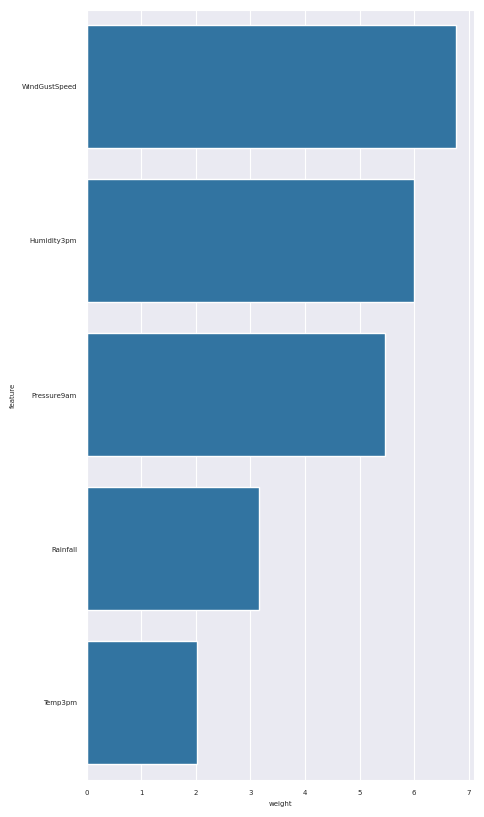

In [61]:
plt.figure(figsize=(5, 10))
sns.barplot(data=weight_df.sort_values("weight", ascending=False).head(5), x="weight", y="feature")


**Model prediction and Evaluation**

In [62]:
x_train = train_inputs[numeric_cols + encoded_cols]
x_val = val_inputs[numeric_cols + encoded_cols]
x_test = test_inputs[numeric_cols + encoded_cols]

In [63]:
train_preds = model.predict(x_train)

In [64]:
#let's check the accuracy of the model by comparing the predictions to the actual values
from sklearn.metrics import accuracy_score
accuracy_score(train_target, train_preds)

0.8519206433440829

The result above shows that the model acheived an accuracy of 85.1 percent.

In [65]:
#let's create a confusion matrix for a better visualization of result
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(train_target, train_preds, normalize = 'true')

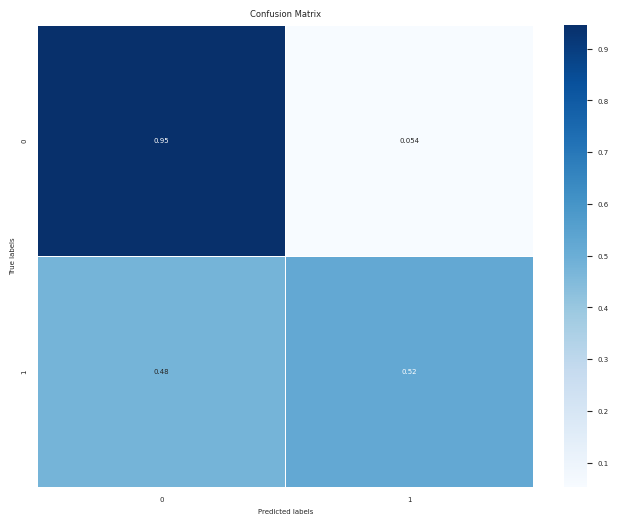

In [66]:
def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True,cmap="Blues", linewidths=.5)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()


plot_confusion_matrix(conf_matrix)

The model predicts a high false negative meaning that it predicts no-rain for days with rain. Therefore, we can not rely on this model if we want to do outdoor activities that can be disturbed by rainfall.

In [67]:
#for test target
test_preds = model.predict(x_test)
test_conf_matrix = confusion_matrix(test_target, test_preds, normalize = 'true')
test_conf_matrix


array([[0.94739754, 0.05260246],
       [0.51776824, 0.48223176]])

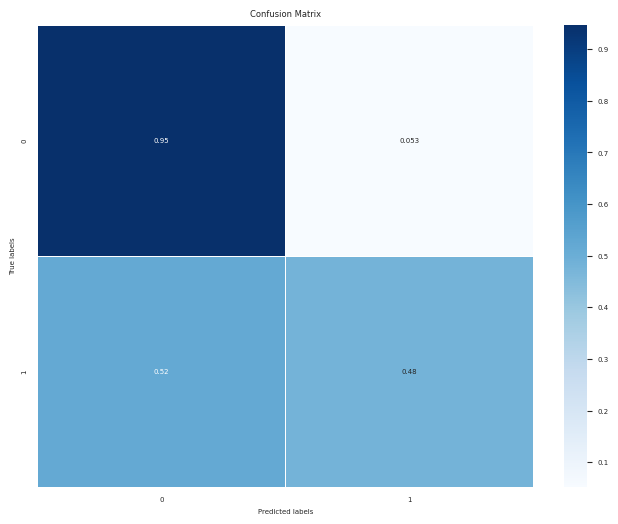

In [68]:
def plot_confusion_matrix(test_conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(test_conf_matrix, annot=True,cmap="Blues", linewidths=.5)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()


plot_confusion_matrix(test_conf_matrix)

In [69]:
#for val data
val_preds = model.predict(x_val)
val_confusion_matrix = confusion_matrix(val_targets, val_preds,normalize = 'true')
val_confusion_matrix

array([[0.95833025, 0.04166975],
       [0.53996646, 0.46003354]])

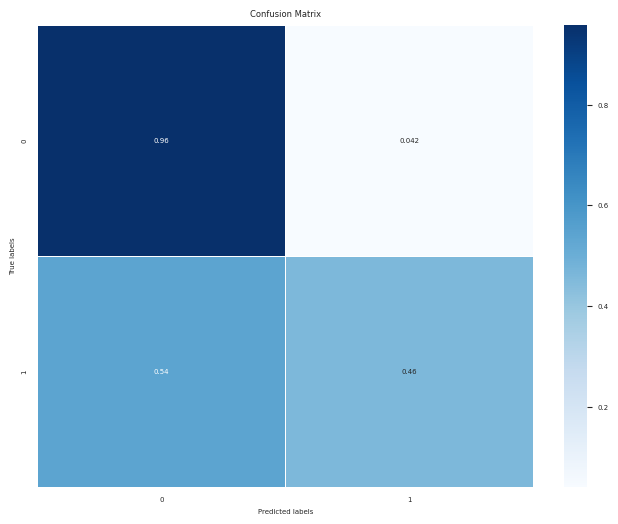

In [70]:
def plot_confusion_matrix(val_confusion_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(val_confusion_matrix, annot=True,cmap="Blues", linewidths=.5)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()


plot_confusion_matrix(val_confusion_matrix)

In [71]:
#model accuracy on test data
accuracy_score(test_target, test_preds)

0.8420070011668611

In [72]:
#model accuracy on val data
accuracy_score(val_targets, val_preds)

0.8539996488969512

The model has achieved an accuracy of about 84% on both test and validation datasets.

**HOW GOOD IS 84% ACCURACY?**

Comparing our model to a random or dump model is a very good way to verify if this accuracy score is actually good enough.

Therefore, we will create two models: one that guesses randomly and another that always return 'NO'. They both ignore the inputs given to them.



In [73]:
def random_guess(inputs):
  return np.random.choice(["No", "Yes"], len(inputs))


In [74]:
def all_no(inputs):
  return np.full(len(inputs), "No")

Let's check the accuracies of these two models on the test set

In [75]:
accuracy_score(test_target, random_guess(x_test))

0.49937767405678724

In [76]:
accuracy_score(test_target, all_no(x_test))

0.7734344612991054

The scores above shows that our logisticregression model performs better than the random and dumb model comparing their accuracy scores.

In [77]:
new_input = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             "MaxTemp": 33.2,
             "Rainfall": 10.2,
             "Evaporation": 4.2,
             "Sunshine": np.nan,
             "WindGustDir": 'NNW',
             "WindGustSpeed": 52.0,
             "WindDir9am": 'NW',
             "WindDir3pm": "NNE",
             "WindSpeed9am": 13.0,
             "WindSpeed3pm": 20.0,
             "Humidity9am": 89.0,
             "Humidity3pm": 20.0,
             "Pressure9am": 1004.8,
             "Pressure3pm": 1001.5,
             "Cloud9am": 8.0,
             "Cloud3pm": 5.0,
             "Temp9am": 25.7,
             "Temp3pm": 33.0,
             "RainToday": 'Yes'}

In [78]:
new_input_df= pd.DataFrame([new_input])

In [79]:
new_input_df

Date   Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2021-06-19  Katherine     23.2     33.2      10.2          4.2       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0         NNW           52.0         NW        NNE          13.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          20.0         89.0         20.0       1004.8       1001.5       8.0   

   Cloud3pm  Temp9am  Temp3pm RainToday  
0       5.0     25.7     33.0       Yes

Above is a dataframe with the same number of columns as "raw_data" except the "RainTomorrow" column which is the prediction target.

To use our model on this dataframe, we must apply the same transformation applied on "raw_data" while training the model.

In [80]:
#imputation of missing values
new_input_df[numeric_cols] = imputer.transform(new_input_df[numeric_cols])
#scaling the dataframe
new_input_df[numeric_cols] = scaler.transform(new_input_df[numeric_cols])
#OneHotEncoding
new_input_df[encoded_cols] = encoder.transform(new_input_df[cat_cols])

new_input_df

<ipython-input-80-bbcad4f3a8f5>:6: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-80-bbcad4f3a8f5>:6: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-80-bbcad4f3a8f5>:6: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-80-bbcad4f3a8f5>:6: PerformanceWarning:

Da

Date   Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2021-06-19  Katherine  0.747642  0.718336  0.027493     0.028966  0.526244   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0         NNW       0.356589         NW        NNE           0.1   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0      0.229885         0.89          0.2     0.401653       0.3904  0.888889   

   Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  Location_Albany  \
0  0.555556  0.694093  0.737044       Yes                0.0              0.0   

   Location_Albury  Location_AliceSprings  Location_BadgerysCreek  \
0              0.0                    0.0                     0.0   

   Location_Ballarat  Location_Bendigo  Location_Brisbane  Location_Cairns  \
0                0.0               0.0                0.0              0.0   

   Location_Canberra  Location_Cobar  Location_CoffsHarbour  \
0                0.0             0.0                    0.0   

   Location_Dartmoor  Location_Darwin  Location_GoldCoast  Location_Hobart  \
0                0.0              0.0                 0.0              0.0   

   Location_Katherine  Location_Launceston  Location_Melbourne  \
0                 1.0                  0.0                 0.0   

   Location_MelbourneAirport  Location_Mildura  Location_Moree  \
0                        0.0               0.0             0.0   

   Location_MountGambier  Location_MountGinini  Location_Newcastle  \
0                    0.0                   0.0                 0.0   

   Location_Nhil  Location_NorahHead  Location_NorfolkIsland  \
0            0.0                 0.0                     0.0   

   Location_Nuriootpa  Location_PearceRAAF  Location_Penrith  Location_Perth  \
0                 0.0                  0.0               0.0             0.0   

   Location_PerthAirport  Location_Portland  Location_Richmond  Location_Sale  \
0                    0.0                0.0                0.0            0.0   

   Location_SalmonGums  Location_Sydney  Location_SydneyAirport  \
0                  0.0              0.0                     0.0   

   Location_Townsville  Location_Tuggeranong  Location_Uluru  \
0                  0.0                   0.0             0.0   

   Location_WaggaWagga  Location_Walpole  Location_Watsonia  \
0                  0.0               0.0                0.0   

   Location_Williamtown  Location_Witchcliffe  Location_Wollongong  \
0                   0.0                   0.0                  0.0   

   Location_Woomera  WindGustDir_E  WindGustDir_ENE  WindGustDir_ESE  \
0               0.0            0.0              0.0              0.0   

   WindGustDir_N  WindGustDir_NE  WindGustDir_NNE  WindGustDir_NNW  \
0            0.0             0.0              0.0              1.0   

   WindGustDir_NW  WindGustDir_S  WindGustDir_SE  WindGustDir_SSE  \
0             0.0            0.0             0.0              0.0   

   WindGustDir_SSW  WindGustDir_SW  WindGustDir_W  WindGustDir_WNW  \
0              0.0             0.0            0.0              0.0   

   WindGustDir_WSW  WindGustDir_nan  WindDir9am_E  WindDir9am_ENE  \
0              0.0              0.0           0.0             0.0   

   WindDir9am_ESE  WindDir9am_N  WindDir9am_NE  WindDir9am_NNE  \
0             0.0           0.0            0.0             0.0   

   WindDir9am_NNW  WindDir9am_NW  WindDir9am_S  WindDir9am_SE  WindDir9am_SSE  \
0             0.0            1.0           0.0            0.0             0.0   

   WindDir9am_SSW  WindDir9am_SW  WindDir9am_W  WindDir9am_WNW  \
0             0.0            0.0           0.0             0.0   

   WindDir9am_WSW  WindDir9am_nan  WindDir3pm_E  WindDir3pm_ENE  \
0             0.0             0.0           0.0             0.0   

   WindDir3pm_ESE  WindDir3pm_N  WindDir3pm_NE  WindDir3pm_NNE  \
0             0.0           0.0            0.0             1.0   

   WindDi

In [81]:
x_new_input_df = new_input_df[numeric_cols + encoded_cols]
x_new_input_df

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.747642  0.718336  0.027493     0.028966  0.526244       0.356589   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0           0.1      0.229885         0.89          0.2     0.401653   

   Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  Location_Adelaide  \
0       0.3904  0.888889  0.555556  0.694093  0.737044                0.0   

   Location_Albany  Location_Albury  Location_AliceSprings  \
0              0.0              0.0                    0.0   

   Location_BadgerysCreek  Location_Ballarat  Location_Bendigo  \
0                     0.0                0.0               0.0   

   Location_Brisbane  Location_Cairns  Location_Canberra  Location_Cobar  \
0                0.0              0.0                0.0             0.0   

   Location_CoffsHarbour  Location_Dartmoor  Location_Darwin  \
0                    0.0                0.0              0.0   

   Location_GoldCoast  Location_Hobart  Location_Katherine  \
0                 0.0              0.0                 1.0   

   Location_Launceston  Location_Melbourne  Location_MelbourneAirport  \
0                  0.0                 0.0                        0.0   

   Location_Mildura  Location_Moree  Location_MountGambier  \
0               0.0             0.0                    0.0   

   Location_MountGinini  Location_Newcastle  Location_Nhil  \
0                   0.0                 0.0            0.0   

   Location_NorahHead  Location_NorfolkIsland  Location_Nuriootpa  \
0                 0.0                     0.0                 0.0   

   Location_PearceRAAF  Location_Penrith  Location_Perth  \
0                  0.0               0.0             0.0   

   Location_PerthAirport  Location_Portland  Location_Richmond  Location_Sale  \
0                    0.0                0.0                0.0            0.0   

   Location_SalmonGums  Location_Sydney  Location_SydneyAirport  \
0                  0.0              0.0                     0.0   

   Location_Townsville  Location_Tuggeranong  Location_Uluru  \
0                  0.0                   0.0             0.0   

   Location_WaggaWagga  Location_Walpole  Location_Watsonia  \
0                  0.0               0.0                0.0   

   Location_Williamtown  Location_Witchcliffe  Location_Wollongong  \
0                   0.0                   0.0                  0.0   

   Location_Woomera  WindGustDir_E  WindGustDir_ENE  WindGustDir_ESE  \
0               0.0            0.0              0.0              0.0   

   WindGustDir_N  WindGustDir_NE  WindGustDir_NNE  WindGustDir_NNW  \
0            0.0             0.0              0.0              1.0   

   WindGustDir_NW  WindGustDir_S  WindGustDir_SE  WindGustDir_SSE  \
0             0.0            0.0             0.0              0.0   

   WindGustDir_SSW  WindGustDir_SW  WindGustDir_W  WindGustDir_WNW  \
0              0.0             0.0            0.0              0.0   

   WindGustDir_WSW  WindGustDir_nan  WindDir9am_E  WindDir9am_ENE  \
0              0.0              0.0           0.0             0.0   

   WindDir9am_ESE  WindDir9am_N  WindDir9am_NE  WindDir9am_NNE  \
0             0.0           0.0            0.0             0.0   

   WindDir9am_NNW  WindDir9am_NW  WindDir9am_S  WindDir9am_SE  WindDir9am_SSE  \
0             0.0            1.0           0.0            0.0             0.0   

   WindDir9am_SSW  WindDir9am_SW  WindDir9am_W  WindDir9am_WNW  \
0             0.0            0.0           0.0             0.0   

   WindDir9am_WSW  WindDir9am_nan  WindDir3pm_E  WindDir3pm_ENE  \
0             0.0             0.0           0.0             0.0   

   WindDir3pm_ESE  WindDir3pm_N  WindDir3pm_NE  WindDir3pm_NNE  \
0             0.0           0.0            0.0             1.0   

   WindDir3pm_NNW  WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  \
0             0.0            0.0           0.0           

In [82]:
#prediction
predict = model.predict(x_new_input_df)[0]
predict

'No'

Our model predicts that it will rain at "Katherine" tomorrow.